# EDA Dengue DataSet

In [2]:
# Import essentials
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
# load the csv
train_values_df = pd.read_csv('dengue_features_train.csv') # Load the `train` file
train_labels_df = pd.read_csv('dengue_labels_train.csv') # Load the `train` file
test_values_df = pd.read_csv('dengue_features_test.csv') # Load the `train` file

#store the original dimensions
len_train=train_values_df.shape[0]
len_test=test_values_df.shape[0]

In [4]:
train_values_df.head(2)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.1226,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.1699,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6


In [5]:
print('length of train: ', len_train)
print('length of test: ',len_test)

length of train:  1456
length of test:  416


In [6]:
test_values_df.head(2)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.0189,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.0124,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3


In [7]:
train_values_df.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [8]:
test_values_df.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

In [9]:
features_all = train_values_df.columns.tolist()
print(features_all)
print(len(features_all))

['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm']
24


In [10]:
train_values_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

In [11]:
# posem les dates en format de dates
train_values_df['Date_Start_week'] =  pd.to_datetime(train_values_df['week_start_date'], format='%Y-%m-%d')

### fins aqui: 
1. totes les dades son floats, excepte el dia week_start_date (data), city i any-weekofyear (int).
2. Algunes variables tenen NaN --> haurem d'imputar dades (tant al train com al test).Millor ajuntar-ho tot i fer el missing data imputattion a tot.
3. Al imputar NaNs hemde tenir en compte que tenim dos ciutats diferents, amb dos ¿patrons diferents de clima?
4. Obrsevacions + dades reanalisis? podem fer servir el reanalisis per omplir Nans? 
4. 24 columnes, 1456 dades al train i 416 al test.

#### Les variables son:

1. ndvi: Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements (cada una Pixel southeast (la se) of city centroid, notheast, ...)
2. station: NOAA's GHCN daily climate data weather station measurements
3. reanalysis: NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)

#### per tant, de reanalysis i station: 
1. en les station, la rang en teoria es la diferencia diurna entre maxima i minima (pero sembla tenen NaNs en diferents punts.) Al ser rang diurn no podem inferir-la de la minima-maxima del dia
2. les **station_avg_temp_c** (43 NaNs) i **reanalysis_air_temp_k donen info semblant** (10NaNs) (mean average temp), podem fer servir una per predir l'altre. Veur ecom perque en algun moment falten dades.
3. **station_max_temp_c (i min)** i **reanalysis_max_air_temp_k (i min)** en teoria son el mateix, reomplim dades a partir d'elles? no tan facil....
    * estaria be veure si hi ha algun biaix entre aquestes, i per tant potser fer servir una regressio lineal? no simplement el valor del reanalysis..?(seria lo facil)
4. per precipitation, en tenim 3: station_precip_mm, reanalysis_sat_precip_amt_mm, precipitation_amt_mm


## Anem a mirar com estan els NaNs i veiem que podem fer per millorar-ho
### Ho mirem separant les ciutats, 

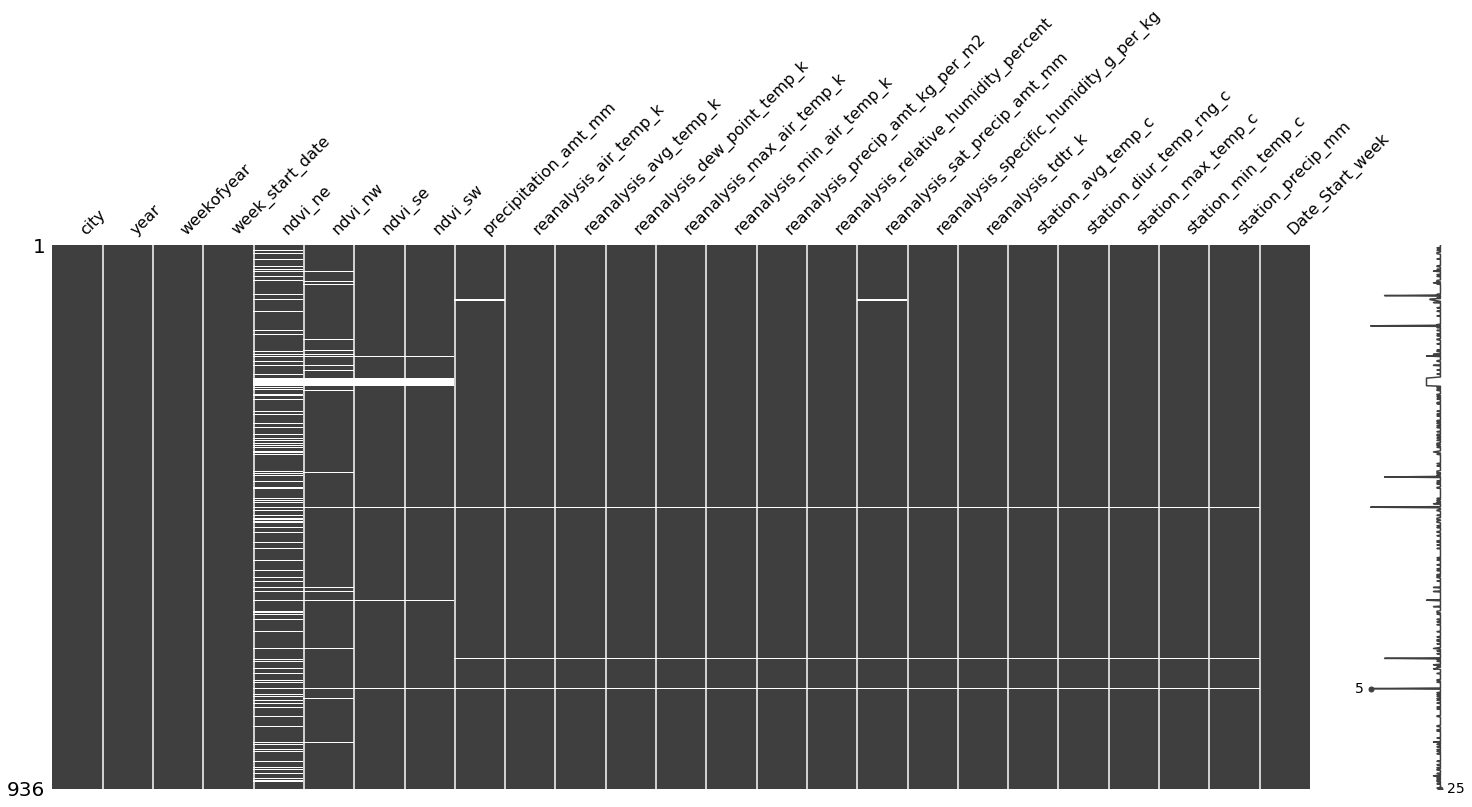

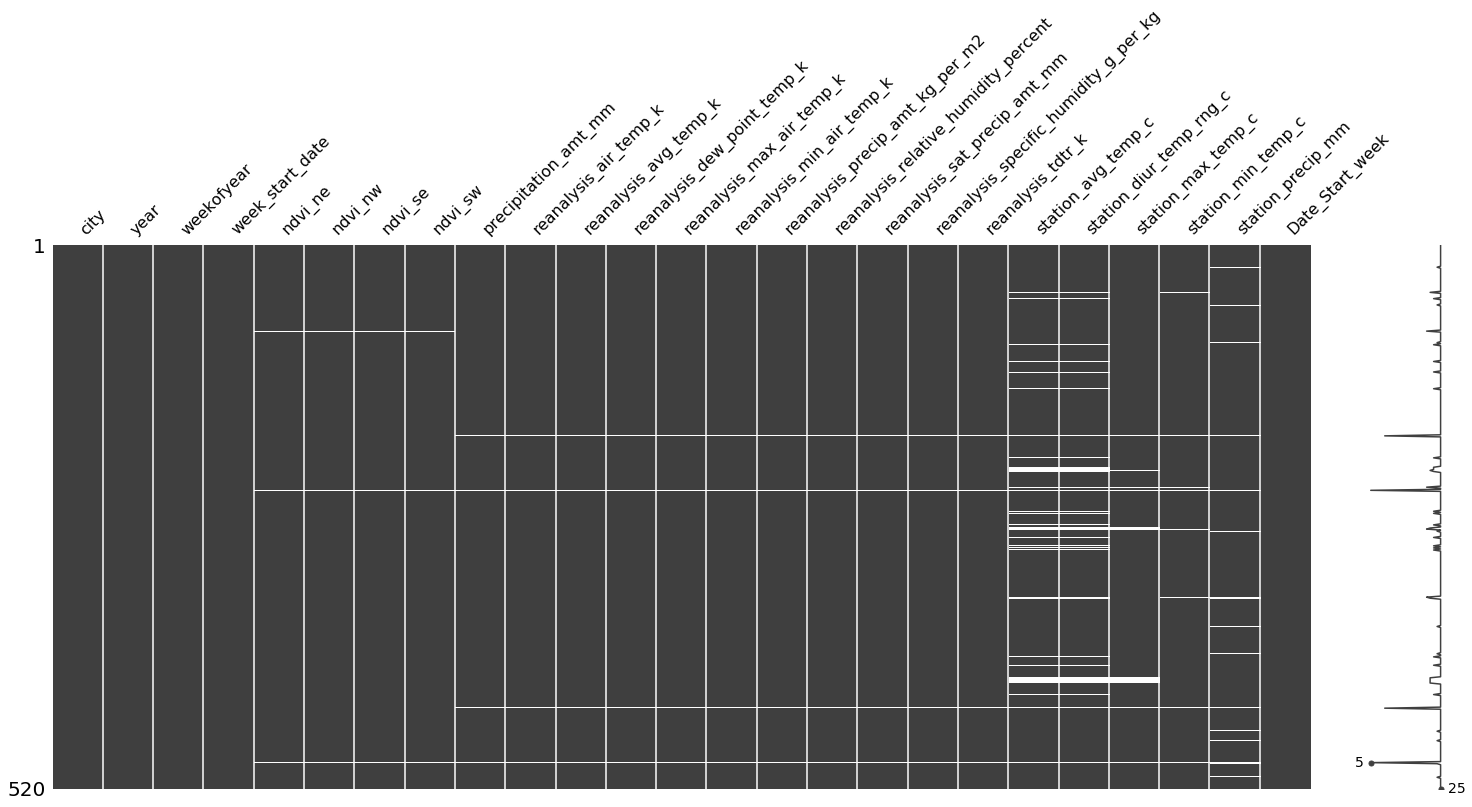

In [12]:
import missingno as msno
msno.matrix(train_values_df[train_values_df['city']=='sj'])
plt.show()

msno.matrix(train_values_df[train_values_df['city']=='iq'])
plt.show()

* el mes inteessant aqui es que hi han **algunes setmanes en les que falta tot** (en total deuen ser unes 10, perque son els Nans que hem vist als reanalisis). --> **Aquestes les eliminem i aixi seguim**.
* el que també es molt interessant es que **nomes una de les ciutats te mssing values per les variables de estacio meteo**
* Farem servir alguna de les variables reanalysis per localitzar la fila i eliminarles

In [13]:
# Aqui ara eliminem del dataframe les setmanes que tenen tot NaNs (son les mateixes que tenen reanalisis NAN)
id_drop= train_values_df[pd.isnull(train_values_df['reanalysis_air_temp_k'])].index.tolist()

#eliminem del datframe i dels labels
train_values_df = train_values_df.drop(id_drop,axis=0)
train_labels_df = train_labels_df.drop(id_drop,axis=0)

##### les temperatures del reanalisi estan en Kelvin, les pasem a Celsius

In [14]:
# passem a ºC totes les que estan en K
train_values_df['reanalysis_air_temp_c']=train_values_df['reanalysis_air_temp_k'] - 273.15
train_values_df['reanalysis_max_air_temp_c']=train_values_df['reanalysis_max_air_temp_k'] - 273.15
train_values_df['reanalysis_min_air_temp_c']=train_values_df['reanalysis_min_air_temp_k'] - 273.15

##### al ser series temporals, els outliers poden jugar un paper important 

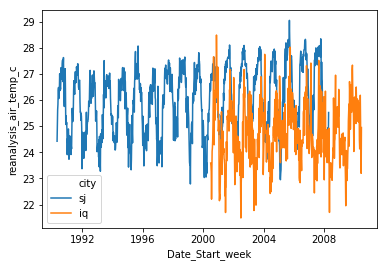

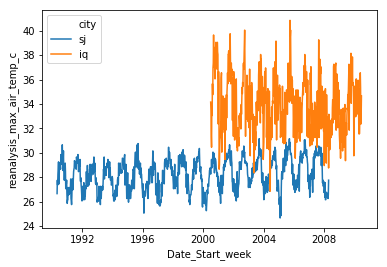

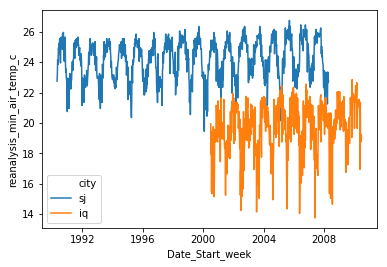

In [15]:
sns.lineplot(x='Date_Start_week',y='reanalysis_air_temp_c',hue='city',data=train_values_df)
plt.show()

sns.lineplot(x='Date_Start_week',y='reanalysis_max_air_temp_c',hue='city',data=train_values_df)
plt.show()

sns.lineplot(x='Date_Start_week',y='reanalysis_min_air_temp_c',hue='city',data=train_values_df)
plt.show()

Les series de reanalisis no semblen tenir outliers

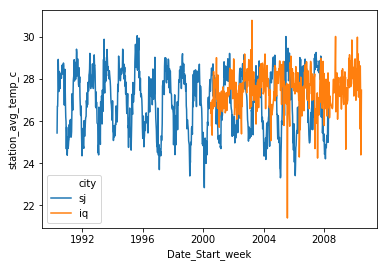

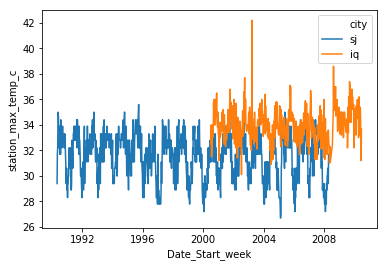

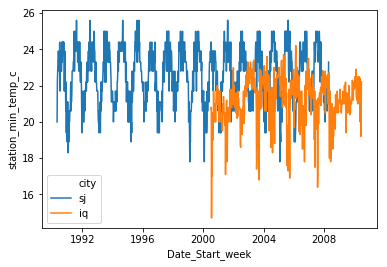

In [16]:
sns.lineplot(x='Date_Start_week',y='station_avg_temp_c',hue='city',data=train_values_df)
plt.show()

sns.lineplot(x='Date_Start_week',y='station_max_temp_c',hue='city',data=train_values_df)
plt.show()

sns.lineplot(x='Date_Start_week',y='station_min_temp_c',hue='city',data=train_values_df)
plt.show()

Vale, per ara no eliminem res, pero per iq algun punt podria ser un outlier (42ºC?). Ho tenim en compte per mes endavant

### mirem la relacio entre temperatures model i estacions (nomes mirem 'iq' perque l'altre ja esta complerta)
* tenir en compte que tenim dos ciutats!
* aixo ens ha de permetre veure si podem fer servir un com a predictor de l'altre

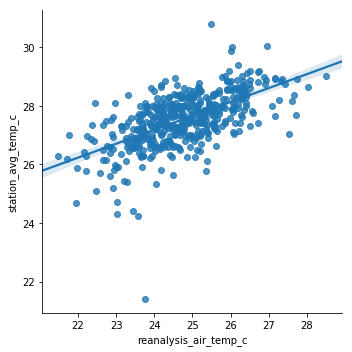

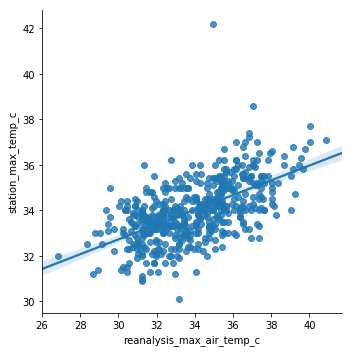

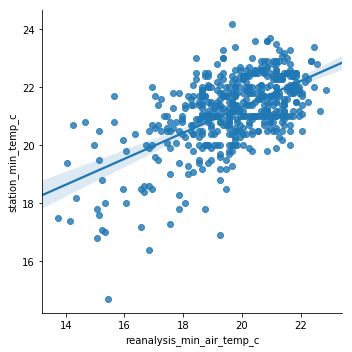

In [18]:
sns.lmplot(x="reanalysis_air_temp_c", y="station_avg_temp_c", data=train_values_df[train_values_df['city']=='iq']);
plt.show()

sns.lmplot(x="reanalysis_max_air_temp_c", y="station_max_temp_c", data=train_values_df[train_values_df['city']=='iq']);
plt.show()

sns.lmplot(x="reanalysis_min_air_temp_c", y="station_min_temp_c", data=train_values_df[train_values_df['city']=='iq']);
plt.show()

* per **iq** la relacio entre reanalysis i station sembla lineal --> la fem srvir per predir NaNs entre ells?

## omplim NaNs "iq" fent servir model regressio lineal
* en el grafics dels Nans hem vist que estan agrupats i son seguits, per tant no podem interpolar lienalment entre un i el següent

In [19]:
train_iq=train_values_df[train_values_df['city']=='iq']
# iq
id_missing= train_iq[pd.isnull(train_iq['station_avg_temp_c'])].index.tolist()
xx = train_iq['reanalysis_air_temp_c'].drop(id_missing,axis=0).values.reshape(-1,1)
yy=train_iq['station_avg_temp_c'].drop(id_missing,axis=0).values.reshape(-1,1)
xx_test=train_iq['reanalysis_air_temp_c'][id_missing].values.reshape(-1,1)

## 1) Omplim temperatura mitjana aplicant un model Lineal Rgeresion
- Farem servir dades del reanalisi per omplir forats de la station

Mean Square error: 0.5673983052677342


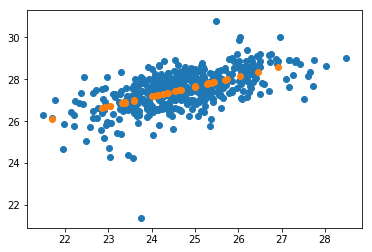

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

LR=LinearRegression()

results = cross_val_score(LR, xx, yy, cv=6, scoring='neg_mean_squared_error')
print('Mean Square error:',(-results.mean()))

#train model and predict
LR.fit(xx,yy)
pred=LR.predict(xx_test)

#fem un plot
plt.scatter(xx,yy)
plt.scatter(xx_test,pred)
plt.show()

# ho posem on toca
train_values_df['station_avg_temp_c'][id_missing] = pred[:,0]

#### repetim per maxim

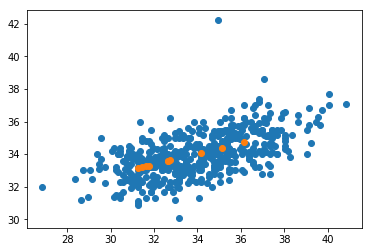

In [23]:
## repetim per maxim
id_missing= train_iq[pd.isnull(train_iq['station_max_temp_c'])].index.tolist()
xx = train_iq['reanalysis_max_air_temp_c'].drop(id_missing,axis=0).values.reshape(-1,1)
yy=train_iq['station_max_temp_c'].drop(id_missing,axis=0).values.reshape(-1,1)
xx_test=train_iq['reanalysis_max_air_temp_c'][id_missing].values.reshape(-1,1)

#predict
LR.fit(xx,yy)
pred=LR.predict(xx_test)

#plot
plt.scatter(xx,yy)
plt.scatter(xx_test,pred)
plt.show()

# ho posem on toca i fem un plot de la time series per veure com queda
train_values_df['station_max_temp_c'][id_missing] = pred[:,0]

#### repetim per minim

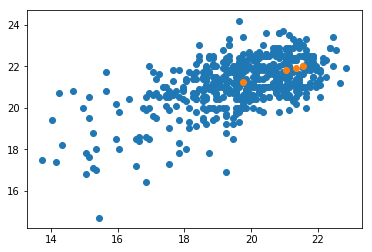

In [24]:
## repetim per minim
id_missing= train_iq[pd.isnull(train_iq['station_min_temp_c'])].index.tolist()
xx = train_iq['reanalysis_min_air_temp_c'].drop(id_missing,axis=0).values.reshape(-1,1)
yy=train_iq['station_min_temp_c'].drop(id_missing,axis=0).values.reshape(-1,1)
xx_test=train_iq['reanalysis_min_air_temp_c'][id_missing].values.reshape(-1,1)

#predict
LR.fit(xx,yy)
pred=LR.predict(xx_test)

#plot
plt.scatter(xx,yy)
plt.scatter(xx_test,pred)
plt.show()

# ho posem on toca i fem un plot de la time series per veure com queda
train_values_df['station_min_temp_c'][id_missing] = pred[:,0]

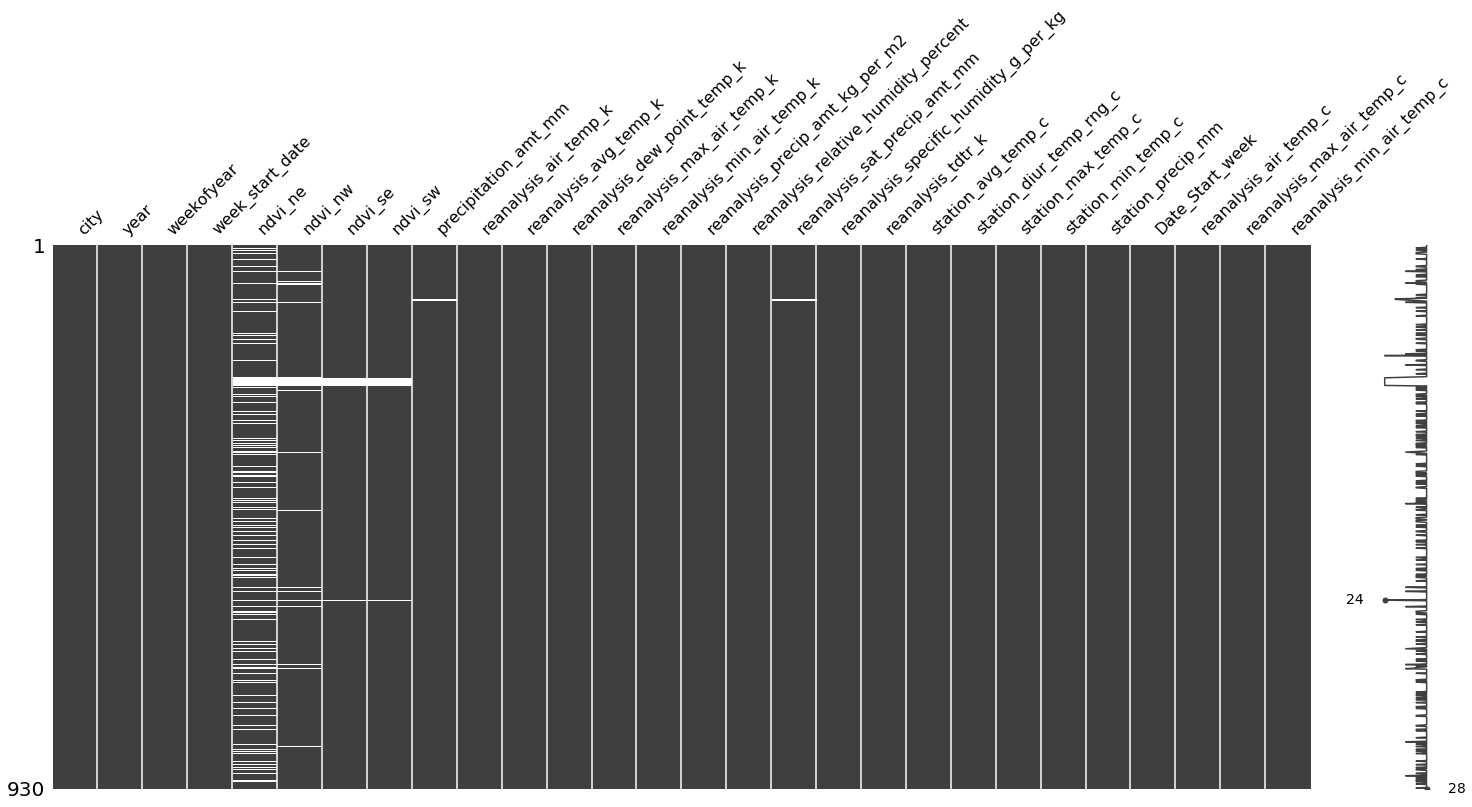

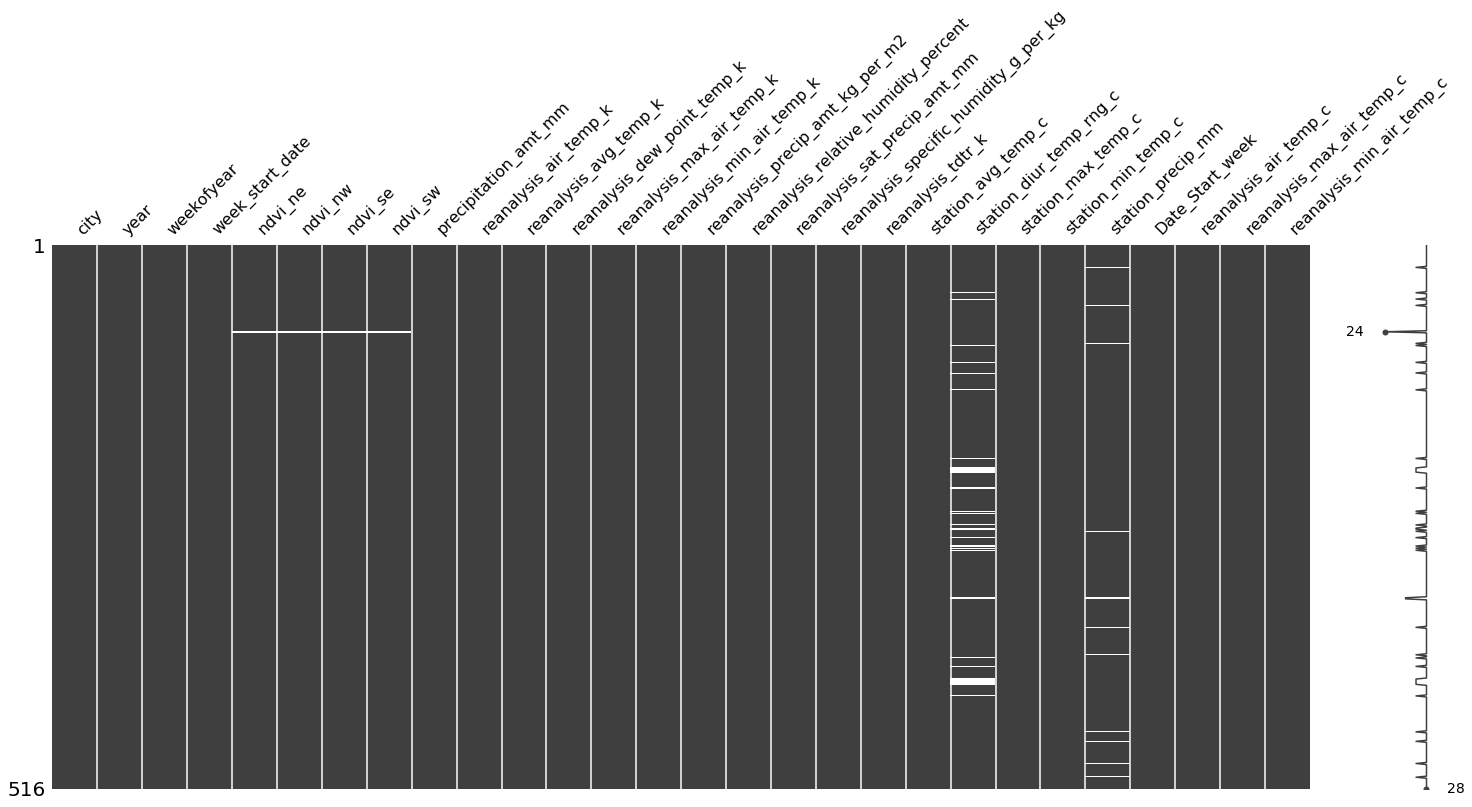

In [25]:
import missingno as msno
msno.matrix(train_values_df[train_values_df['city']=='sj'])
plt.show()

msno.matrix(train_values_df[train_values_df['city']=='iq'])
plt.show()

Ara ens queden Nans a iq en dues variables (encara no hem mirat el ndvi): la variacio diurna de temperatura i la precipitation
    1. jo faria: primer la preciptacio, la comparem amb les altres dues i veiem si les podem fer servir per omplir els valors
    2. despres faria un KNN per la variacio tenint en compte valors mitjans, maxims, minims i pluja.

## Omplim Nans per Precipitation en 'Iq'

In [ ]:
cor_iq=train_values_df[train_values_df['city']=='iq'].corr()
print ('Training correlations iq (Pearson): \n', cor_iq["station_precip_mm"].sort_values(ascending=False))

In [ ]:
sns.lmplot(x="station_precip_mm", y="reanalysis_precip_amt_kg_per_m2", hue='city', data=train_values_df[train_values_df['city']=='iq']);
plt.show()

sns.lmplot(x="station_precip_mm", y="precipitation_amt_mm", data=train_values_df[train_values_df['city']=='iq']);
plt.show()

sns.lmplot(x="station_precip_mm", y="reanalysis_sat_precip_amt_mm", data=train_values_df[train_values_df['city']=='iq']);
plt.show()

sns.lmplot(x="station_precip_mm", y="reanalysis_sat_precip_amt_mm", data=train_values_df[train_values_df['city']=='iq']);
plt.show()

Aqui no podem fer servir cap regresio lineal per omplir els Nans, com a molt, podriem fer un KNN de les variables que mes el puguin afectar:
* station_precip_mm                        
* precipitation_amt_mm                     
* reanalysis_sat_precip_amt_mm             
* reanalysis_relative_humidity_percent  (aquesta no se...)   